# **Multi-Factor Pivot Analysis**

In the previous notebook, the top factors affecting score were identified. This notebook will compare if these different effects interact, and to what degree they interact. The top factors from the previous notebook were:
- `parental_education`
- `lunch_type`
- `ethnicity`
- `test_prep`
- `weekly_study_hours`
- `practice_sports`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ExpandedScoresData_Cleaned.csv')

In [2]:
df.head()

,gender,ethnicity,parental_education,lunch_type,test_prep,parent_marital_status,practice_sports,first_child,num_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score,avg_score
0,female,unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.000000
1,female,group C,some college,standard,unknown,married,sometimes,yes,0.0,unknown,5 - 10,69,90,88,82.333333
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.333333
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,unknown,5 - 10,45,56,42,47.666667
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.333333


### Parental education/Lunch type

parental_education and lunch_type were the two largest differentiating factors. The data at each parental education level should be explored to see how large the difference is between standard and reduced/free lunch. This aims to explore the relationship between socioeconomic factors and student access to resources

In [3]:
# creating parental education level categories, makes for simpler ordered interpretation
education_levels = ['unknown', 'some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
df['parental_education'] = pd.Categorical(df['parental_education'], categories=education_levels, ordered=True)

In [4]:
pivot_ed_lunch = df.pivot_table(
    values='avg_score',
    index='parental_education',
    columns='lunch_type',
    aggfunc='mean',
    observed=False)
pivot_ed_lunch

lunch_type,free/reduced,standard
parental_education,,
unknown,61.661675,71.144695
some high school,57.109078,67.518498
high school,59.621265,68.974797
some college,61.942464,71.251942
associate's degree,63.661789,73.411435
bachelor's degree,66.202850,75.596139
master's degree,68.760444,78.424980


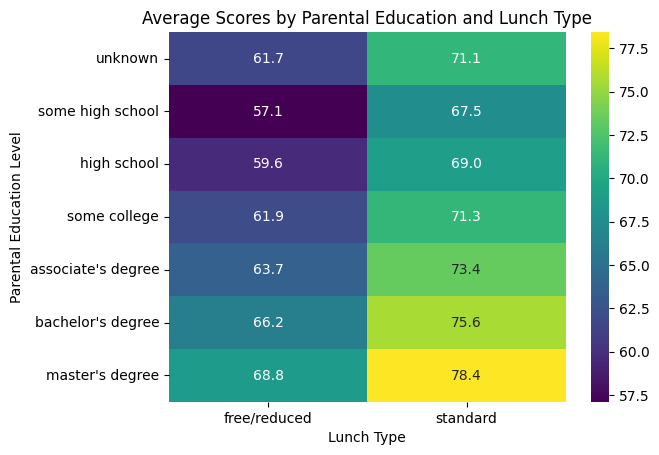

In [5]:
# while this data can be read clearly, the differences will be easier to see with a heatmap
sns.heatmap(pivot_ed_lunch, annot=True, fmt=".1f", cmap="viridis")
plt.title('Average Scores by Parental Education and Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Parental Education Level')
plt.show()

The heatmap above allows for easier visualization of the differences between scores across different parental education levels. Scores clearly rise with an increase in parental education with both standard and free/reduced lunches. 

The high contrast heatmap shows clear differences between those receiving standard and free/reduced lunches, but it will be easier to interpret when the difference in quantified. 

In [6]:
gap_std_free_by_ed = pivot_ed_lunch['standard'] - pivot_ed_lunch['free/reduced']
gap_std_free_by_ed

parental_education
unknown                9.483020
some high school      10.409420
high school            9.353532
some college           9.309479
associate's degree     9.749646
bachelor's degree      9.393289
master's degree        9.664536
dtype: float64

The lunch-type gap is highest at the 'some high school' education level (10.4 pts) and lowest at 'some college' (9.3 pts). Overall, the gap stays within a narrow band of 9.3–10.4 points across all parental education levels — a notably consistent effect.

In [7]:
education_effect_by_lunch = pivot_ed_lunch.max(axis=0) - pivot_ed_lunch.min(axis=0)
education_effect_by_lunch

lunch_type
free/reduced    11.651366
standard        10.906482
dtype: float64

Parental education spans ~11 pts within both standard and free/reduced lunch, indicating that the education effect is strong regardless of lunch type. 

**Analysis takeaway:**
- Parental education lifts scores by ~11 pts in both lunch groups
- Lunch gaps are fairly consistent across all education levels

These results show that the lunch effects seen earlier do not vary by parental education. 

### Ethnicity × Lunch Type
The interaction between lunch type and ethnicity will now be explored. This will determine if and how the lunch gap differs by ethnic group, and where the largest combined disadvantage appears.

In [8]:
pivot_eth_lunch = df.pivot_table(
    values='avg_score',
    index='ethnicity',
    columns='lunch_type',
    aggfunc='mean',
    observed=False)
pivot_eth_lunch

lunch_type,free/reduced,standard
ethnicity,,
group A,58.302551,68.490760
group B,59.129239,69.154819
group C,60.482088,70.087267
group D,63.229143,73.083709
group E,68.802469,76.967050
unknown,61.481908,70.719968


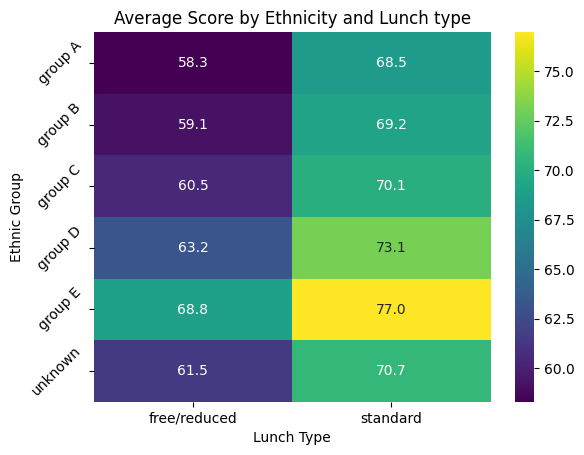

In [9]:
# creating a heatmap for easier visualization
sns.heatmap(pivot_eth_lunch, annot=True, fmt=".1f", cmap="viridis")
plt.title('Average Score by Ethnicity and Lunch type')
plt.xlabel('Lunch Type')
plt.yticks(rotation=45)
plt.ylabel('Ethnic Group')
plt.show()

The average scores are the least with group A, increasing alphabetically to group E. The unknown group somewhat falls in the middle. The differences between lunch type hover around 10 pts for all ethnic groups. Both differences need to be quantified for better analysis. 

In [10]:
gap_std_free_by_eth = pivot_eth_lunch['standard'] - pivot_eth_lunch['free/reduced']
gap_std_free_by_eth

ethnicity
group A    10.188209
group B    10.025581
group C     9.605179
group D     9.854566
group E     8.164581
unknown     9.238060
dtype: float64

After quantifying the differences between lunch types, it can be seen that group A, B, C and D have  differences between 9.6 and 10.2. The difference is noticeably lower with group E at 8.16 pts. Based on this, ethnic group E is least impacted by socioeconomic status as captured by the punch type. 

In [11]:
# identifying the most disadvantaged group 
min_score = pivot_eth_lunch.min().min()
min_lunch = pivot_eth_lunch.min().idxmin()
min_eth = pivot_eth_lunch[min_lunch].idxmin()
min_eth, min_lunch, float(min_score)

('group A', 'free/reduced', 58.30255057167986)

Students from ethnic group A on free/reduced lunch score the lowest overall (avg 58.3) highlighting a combined disadvantage of group membership and socioeconomic status. 

In [12]:
eth_spread_by_lunch = pivot_eth_lunch.max(axis=0) - pivot_eth_lunch.min(axis=0)
eth_spread_by_lunch

lunch_type
free/reduced    10.499919
standard         8.476290
dtype: float64

The spread in free/reduced lunch is over 2 pts larger than that of a standard lunch, indicating there is more disparity in the free lunch group. 

**Analysis takeaway**
- Group E has the lowest difference between lunch type, indicating lower impact by socioeconomic status
- Students in Group A on free/reduced lunches are the most disadvantaged 
- The disparity in scores in standard lunches is noticeably lower than that in free/reduced lunches across different ethnic groups

These results show that the lunch effects seen earlier vary by ethnicity. 

### Parental Education/Test Prep

In [13]:
pivot_ed_prep = df.pivot_table(
    values='avg_score',
    index='parental_education',
    columns='test_prep',
    aggfunc='mean',
    observed=False)
pivot_ed_prep

test_prep,completed,none,unknown
parental_education,,,
unknown,72.231211,66.069204,66.854938
some high school,68.867328,61.237813,63.998974
high school,70.286929,63.278123,66.402697
some college,72.305455,65.735641,67.472422
associate's degree,74.184567,67.592994,70.926805
bachelor's degree,77.447730,69.477624,72.960452
master's degree,79.049172,72.572412,76.075000


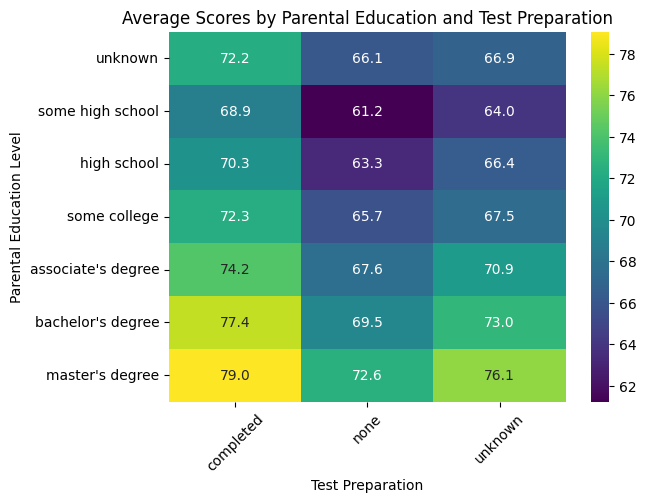

In [14]:
sns.heatmap(pivot_ed_prep, annot=True, fmt=".1f", cmap="viridis")
plt.title('Average Scores by Parental Education and Test Preparation')
plt.xlabel('Test Preparation')
plt.xticks(rotation=45)
plt.ylabel('Parental Education Level')
plt.show()

Students who complete test prep tend to score higher than those who do not. Both have an increase in score with an increase in parental education. Students with unknown test prep status tend to score slightly higher than students who do not complete it. 

In [15]:
gap_ed_prep = pivot_ed_prep['completed'] - pivot_ed_prep['none']
gap_ed_prep

parental_education
unknown               6.162006
some high school      7.629515
high school           7.008806
some college          6.569814
associate's degree    6.591573
bachelor's degree     7.970106
master's degree       6.476760
dtype: float64

The table above quantifies the difference between students who complete test prep vs those who do not across all parental educational levels. The differences in most education levels are similar, between ~6.5-7. Students whose parents have bachelors or some high school show noticeably higher scores with test prep and 7.97 and 7.63 respectively. 

In [16]:
education_effect_none = pivot_ed_prep['none'].max() - pivot_ed_prep['none'].min()
education_effect_completed = pivot_ed_prep['completed'].max() - pivot_ed_prep['completed'].min()
education_effect_unknown = pivot_ed_prep['unknown'].max() - pivot_ed_prep['unknown'].min()

education_spans = pd.Series({
    'none': education_effect_none,
    'completed': education_effect_completed,
    'unknown': education_effect_unknown
}).round(2)
print(education_spans)

none         11.33
completed    10.18
unknown      12.08
dtype: float64


The table above finds the difference in the highest and lowest score for each prep category across all parental education levels. Students who complete test prep variation show 1 pt less variability in scoring than those who do not. The gap is slightly wider for students whose test prep status is unknown. 

In [17]:
# Global min and max scores in the pivot table
min_score = pivot_ed_prep.min().min()
max_score = pivot_ed_prep.max().max()

min_prep = pivot_ed_prep.min().idxmin()          # column where the min is
min_edu = pivot_ed_prep[min_prep].idxmin()       # row within that column

max_prep = pivot_ed_prep.max().idxmax()          # column where the max is
max_edu = pivot_ed_prep[max_prep].idxmax()       # row within that column

print(f"Lowest combination: '{min_edu}', prep='{min_prep}', avg_score={min_score:.2f}")
print(f"Highest combination: '{max_edu}', prep='{max_prep}', avg_score={max_score:.2f}")
print(f"Difference between lowest and highest: {max_score - min_score:.2f} points")


Lowest combination: 'some high school', prep='none', avg_score=61.24
Highest combination: 'master's degree', prep='completed', avg_score=79.05
Difference between lowest and highest: 17.81 points


The most advantaged group is students who complete test prep and whose parents have a masters degree. The least advantaged group is students who do not complete test prep and whose parents have some level of high school education. The difference between these two groups is very large at 17.8 pts. 

**Analysis takeaway**
- Completing test prep adds 6-7 points across all parental education levels
- Parental education adds points regardless of test prep status

Test prep is beneficial everywhere, but disparities due to parental education still exist. 

### Lunch Type × Test Prep

In [18]:
pivot_lunch_prep = df.pivot_table(
    values='avg_score',
    index='lunch_type',
    columns='test_prep',
    aggfunc='mean',
    observed=False)
pivot_lunch_prep

test_prep,completed,none,unknown
lunch_type,,,
free/reduced,66.710141,59.383883,61.570119
standard,75.893298,69.108615,71.803905


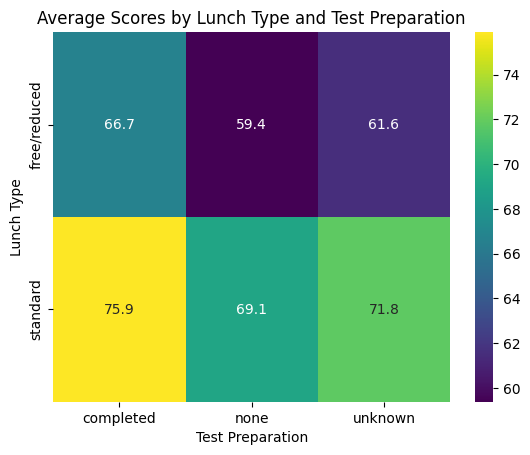

In [19]:
# while this is a smaller table, a heatmap will still help visualize differences
sns.heatmap(pivot_lunch_prep, annot=True, fmt=".1f", cmap="viridis")
plt.title('Average Scores by Lunch Type and Test Preparation')
plt.xlabel('Test Preparation')
plt.ylabel('Lunch Type')
plt.show()

The students who receive a standard lunch score higher across all categories. Students who receive a standard lunch but do not complete test prep score higher than those receving free lunches and still completing test prep. This shows that students may have greater benefit from a standard lunch than completing test prep. 

Those who complete test prep score higher than those who do not regardless of lunch type. 

In [20]:
prep_gaps = pivot_lunch_prep['completed'] - pivot_lunch_prep['none']
prep_gaps

lunch_type
free/reduced    7.326258
standard        6.784683
dtype: float64

Test prep provides a slightly larger boost for free/reduced lunch students (7.3 pts) than for standard lunch students (6.8 pts), suggesting it is marginally more impactful for lower-SES students — though the difference is small.

In [21]:
lunch_gaps = pivot_lunch_prep.loc['standard'] - pivot_lunch_prep.loc['free/reduced']
lunch_gaps

test_prep
completed     9.183157
none          9.724732
unknown      10.233787
dtype: float64

Students who complete test prep show a slightly smaller gap between lunch types (9.18 pts) compared to those who do not (9.72 pts). This means test prep narrows the socioeconomic gap slightly, but does not close it — the SES advantage persists even after controlling for preparation.

In [22]:
# finding the extreme gaps
min_score = pivot_lunch_prep.min().min()
max_score = pivot_lunch_prep.max().max()
min_prep = pivot_lunch_prep.min().idxmin()
min_lunch = pivot_lunch_prep[min_prep].idxmin()
max_prep = pivot_lunch_prep.max().idxmax()
max_lunch = pivot_lunch_prep[max_prep].idxmax()

print(f"Lowest: lunch='{min_lunch}', prep='{min_prep}' = {min_score:.2f}")
print(f"Highest: lunch='{max_lunch}', prep='{max_prep}' = {max_score:.2f}")
print(f"Total span: {max_score - min_score:.2f} points")

Lowest: lunch='free/reduced', prep='none' = 59.38
Highest: lunch='standard', prep='completed' = 75.89
Total span: 16.51 points


Students who receive a free/reduced lunch with no test prep are at the largest disadvantage. Students with a standard lunch and complete test prep are at the largest advantage. The spread between these two groups is 16.5 points. 

**Analysis takeaway**
- Completing test prep adds ~7 pts for all students
- Students with standard lunches score ~9 pts higher on average
- Test prep helps across all groups, but does not close the underlying lunch gap

### Weekly Study Hours × Practice Sports

In [23]:
# creating study level categorical data for better organization
study_levels = ['unknown', '< 5', '5 - 10', '> 10']
df['weekly_study_hours'] = pd.Categorical(df['weekly_study_hours'], categories=study_levels, ordered=True)

pivot_study_sport = df.pivot_table(
    values='avg_score',
    index='weekly_study_hours',
    columns='practice_sports',
    aggfunc='mean',
    observed=False)
pivot_study_sport

practice_sports,never,regularly,sometimes,unknown
weekly_study_hours,,,,
unknown,65.192130,70.524845,67.722814,69.700000
< 5,64.710984,67.543501,66.453131,66.308489
5 - 10,67.010859,69.319271,68.061666,69.187320
> 10,67.029511,70.810373,69.514654,67.834951


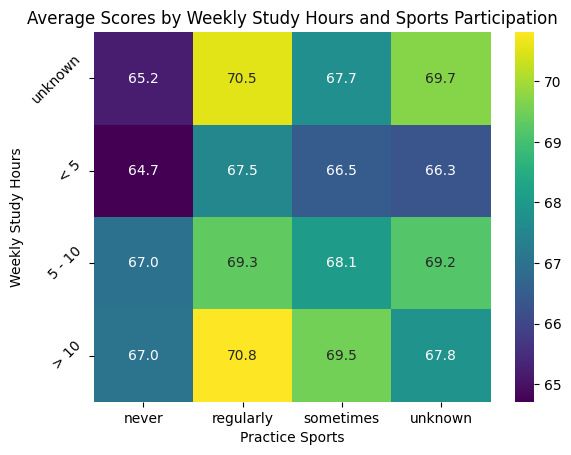

In [24]:
sns.heatmap(pivot_study_sport, annot=True, fmt=".1f", cmap="viridis")
plt.title('Average Scores by Weekly Study Hours and Sports Participation')
plt.xlabel('Practice Sports')
plt.ylabel('Weekly Study Hours')
plt.yticks(rotation=45)
plt.show()

For all study levels, students who regularly participate in sports score the highest, followed by sometimes, then never. This pattern holds consistently across all rows. Students who study more than 10 hours and play sports regularly represent the highest extreme (70.8), while those who study less than 5 hours and never play sports are the lowest (64.7).

In [25]:
sports_gaps = pivot_study_sport['regularly'] - pivot_study_sport['never']
sports_gaps

weekly_study_hours
unknown    5.332715
< 5        2.832516
5 - 10     2.308412
> 10       3.780861
dtype: float64

There is higher variability in scoring for students who study for 10+ hours a week. This could indicate that some students with extracurriculars have more variable scoring. The spread where both are unknown is the highest, which would be assisted by additional data.

In [26]:
study_gaps = pivot_study_sport.loc['> 10'] - pivot_study_sport.loc['< 5']
study_gaps

practice_sports
never        2.318527
regularly    3.266872
sometimes    3.061523
unknown      1.526463
dtype: float64

Students who never practice sports show the least variation in scores across study levels (2.3-point study gap), while those who practice regularly show the most (3.3 points), suggesting that sports participation may amplify the benefit of additional study hours.

In [27]:
min_score = pivot_study_sport.min().min()
max_score = pivot_study_sport.max().max()
min_sport = pivot_study_sport.min().idxmin()
min_study = pivot_study_sport[min_sport].idxmin()
max_sport = pivot_study_sport.max().idxmax()
max_study = pivot_study_sport[max_sport].idxmax()

print(f"Lowest: study='{min_study}', sport='{min_sport}' = {min_score:.2f}")
print(f"Highest: study='{max_study}', sport='{max_sport}' = {max_score:.2f}")
print(f"Total span: {max_score - min_score:.2f} points")

Lowest: study='< 5', sport='never' = 64.71
Highest: study='> 10', sport='regularly' = 70.81
Total span: 6.10 points


The lowest extreme are students who study less than 5 hours and never participate in sports. The highest extreme are students who study more than 10 hours and participate in sports regularly. The difference between these two means in 6.1 points. This is a much lower difference than seen from previous comparisons. 

**Analysis Takeaways**
- Higher study hours drive higher scores for students who have some participation in sports. In students who never participate in sports, there are no differences between those who study 5-10 hours and those who study >10 hours. 
- Increased participation in sports has a small effect on increased scoring, suggesting dicipline spillover for athletes
- Students who study more than 10 hours and participate in sports regularly are at the highest extreme, while those who never participate in sports and study less than 5 hours are at the lowest extreme. 

The spreads across this relationship are much lower than previous analyses from this notebook. There is still some correlation between effort, extracurriculars, and academics that may be worth exploring. 

## Notebook Summary
This notebook examined how the strongest single factors from the previous notebook interact, revealing where combinations of parental education, lunch type, test prep, ethnicity, and student effort create the largest performance gaps. 

- **Parental Education x Lunch Type**: Higher parental education boosts scores for both standard and free/reduced lunches students, but the lunch gap remains at ~9 points across all education levels
- **Ethnicity x Lunch Type**: Within each lunch type, average scores differ across ethnic groups, and lower scores occur where free/reduced lunch overlaps with specific ethnic categories, such as Group A. This indicates a combined disadvantage rather than a single-factor effect.
- **Parental Education x Test Prep**: Completing test prep raises scores by roughly the same number of points at each education level, but students from highly educated households still outperform those from less educated households, even with prep. 
- **Lunch type x Test Prep**: Test prep is beneficial for both standard and free/reduced lunch students,yet standard lunch students with no prep exceed free/reduced students who complete prep, showing that prep does not eliminate socioeconomic gaps. 
- **Weekly Study Hours x Practice Sport**: Increasing study hours consistently improves scores for any level of sports, but remains the same after 5 hours of studying for students who do not participate in sports. Sports participation has a small additional effect. 

The interaction analysis reveals that while test prep and additional study hours provide consistent benefits across groups, they primarily build on existing socioeconomic and resource advantages rather than eliminating them. Free/reduced lunch students from lower-education households (and ethnic group A) consistently show the lowest performance, even when completing test prep. Critically, standard-lunch students with no prep often match or exceed free/reduced students who complete prep, confirming that structural socioeconomic status gaps persist despite interventions. Study hours plateau after 5 hours for non-sports students, suggesting diminishing returns beyond moderate effort levels. 

The next notebook will use these interaction insights to engineer predictive features into composite indicators that capture both main effects and key interactions for modeling student performance. 
